# Early Stopping of Epochs


In [16]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# load the dataset
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
# Data Preprocessing
# convert Categorical into numeric data
tips=pd.get_dummies(tips,drop_first=True)

# Selection Feature and target columns
X=tips.drop('tip',axis=1)
y=tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Building
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),# input layer

    # Hidden Layer
    tf.keras.layers.Dense(32,activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(1)# here no used activation function due to regression task because this is already in linear
])

# Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["mae"])

# Train the Model
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

# Evalute the Model
loss=model.evaluate(X_test,y_test,verbose=0)
print("mean square error:",loss[1])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.8062 - mae: 3.0635
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.9919 - mae: 2.8515 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4737 - mae: 2.2855 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2187 - mae: 2.1312 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1051 - mae: 1.6997 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6039 - mae: 1.4009 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9795 - mae: 1.2676 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1416 - mae: 1.0869 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8803 - mae: 1.0179 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7002 - mae: 1.0330 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3870 - mae: 0.9504 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3558 - mae: 0.9095 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.

mean square error: 0.8299158811569214


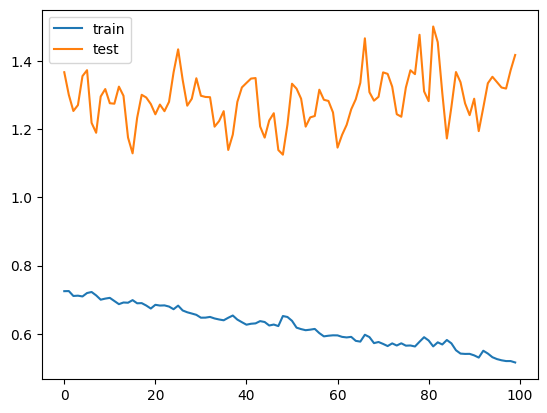

In [19]:
# Plot the training and testing loss
import matplotlib.pyplot as plt
history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0, validation_data=(X_test, y_test))
loss=model.evaluate(X_test,y_test,verbose=0)
print("mean square error:",loss[1])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

# Start the Call Back Function from here


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 10.6626 - mae: 2.9055 - val_loss: 5.3396 - val_mae: 2.0674
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.4558 - mae: 2.5161 - val_loss: 4.0033 - val_mae: 1.7203
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9595 - mae: 2.0586 - val_loss: 2.9356 - val_mae: 1.3871
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6525 - mae: 1.7387 - val_loss: 2.1326 - val_mae: 1.1235
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5336 - mae: 1.6461 - val_loss: 1.5920 - val_mae: 0.9543
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4891 - mae: 1.3668 - val_loss: 1.3225 - val_mae: 0.8548
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6488 - mae: 1.1672 - val_loss: 1.2249 - val_mae: 0.8701
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8834 - mae: 1.0286 - val_loss: 1.2177 - val_mae: 0.9024
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4335 - mae: 0.8817 - va

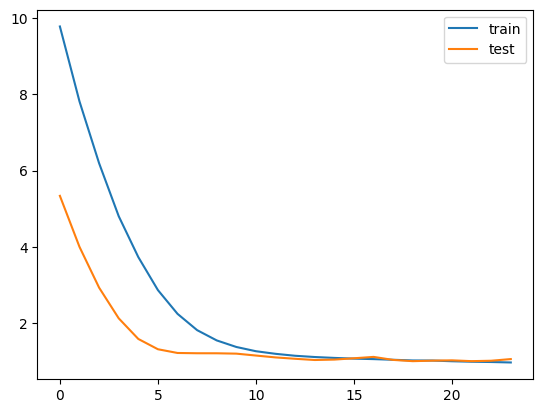

In [20]:
# Early stopping Libarary
from tensorflow.keras.callbacks import EarlyStopping

# Build the Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),# input layer
    tf.keras.layers.Dense(32,activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # output for Regression
])

# Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

# Define the call back function
early_stopping=EarlyStopping(patience=5)

# Train the model with call back function
history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test,y_test), callbacks=[early_stopping])

# Evalute the model (Use mean Squared Error)
loss, mae = model.evaluate(X_test,y_test,verbose=0)
print("mean squared error:",loss)
print("mean absolute error:", mae)

#ploting the trainig and testing loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()